In [ ]:
# read input from pickle
# turn them into numpy array

In [1]:
import pickle
import numpy as np
name='msd_data1.pickle'
infile=open(name,'rb')
data=pickle.load(infile)
infile.close()
Y_train=np.array(data['Y_train'])
X_train=np.array(data['X_train'])
Y_test=np.array(data['Y_test'])
X_test=np.array(data['X_test'])

In [ ]:
# standarlization

In [2]:
mean=np.mean(X_train, axis=0)
std=np.std(X_train, axis=0)
X_train_norm=X_train.copy()
X_test_norm=X_test.copy()
X_train_norm=(X_train_norm-mean)/std
X_test_norm=(X_test_norm-mean)/std

In [3]:
print(X_train)

[[  53.39967   56.67781   55.63508 ...    1.3159     2.37448    1.85999]
 [  42.83464  -33.90478   38.97704 ...    9.72827 -175.51446  -15.8389 ]
 [  49.88591   23.30563   54.79012 ...    1.94152  101.27241    8.99355]
 ...
 [  41.04397  -96.30727   56.8073  ...    3.60251  -97.24809   -5.80797]
 [  42.8676    43.36365   29.17957 ...   18.71014  208.9029   -11.08426]
 [  36.57558   29.8733    -3.08101 ...   21.0417   106.60317    3.44396]]


In [4]:
print(X_train_norm)

[[ 1.62556548  1.05564491  1.33908654 ... -0.22192259 -0.1087769
   0.03568937]
 [-0.09558527 -0.68108552  0.86818824 ...  0.40727698 -1.12403384
  -0.78882859]
 [ 1.05313827  0.41580362  1.31520077 ... -0.17512961  0.45565848
   0.36801238]
 ...
 [-0.38730362 -1.87752187  1.37222348 ... -0.05089658 -0.67734797
  -0.32152912]
 [-0.09021576  0.80037392  0.59122816 ...  1.07907205  1.06993276
  -0.56732961]
 [-1.11524976  0.54172487 -0.32073102 ...  1.25346007  0.48608246
   0.10947997]]


In [ ]:
# 第一題 [myknn_regressor]
# Q1.1 
# Create your myknn_regressor.

# 將index和distance存在一個list of list
# 再用sort取第二個值去比較

In [8]:
def take(x):
    return x[1]
class myknn_regressor:
    def __init__(self, k, option):
        self.k=k
        self.option=option
        self.xtrain=[]
        self.ytrain=[]
    def fit(self, x, y):
        self.xtrain=x
        self.ytrain=y
    def predict(self, xtest):
        ypred=np.zeros((len(xtest),))
        for i in range(len(xtest)):#each test case
            dist=[]#index+distance
            for j in range(len(self.xtrain)):
                temp=(xtest[i]-self.xtrain[j])**(2)
                dist.append([j,np.sum(temp)])
            dist.sort(key=take)
            top=[]
            for j in range(self.k):
                ypred[i]+=self.ytrain[dist[j][0]]/self.k
                top.append(self.ytrain[dist[j][0]])
            if self.option=='remove_outliers' and self.k>=10:
                top.sort()
                q1=self.k*0.25
                if q1 % 1 ==0:
                    q1=int(q1)
                    q1=(top[q1]+top[q1-1])/2
                else:
                    q1=top[int(q1)]
                q3=self.k*0.75
                if q3 % 1 ==0:
                    q3=int(q3)
                    q3=(top[q3]+top[q3-1])/2
                else:
                    q3=top[int(q3)]
                iqr=q3-q1
                low=q1-1.5*iqr
                high=q3+1.5*iqr
                ya=[]
                for x in top:
                    if x>low and x<high:
                        ya.append(x.copy())
                ya=np.array(ya)
                ypred[i]=np.mean(ya)
        return ypred

In [10]:
def rmse(ypred, y):
    return np.sqrt(np.mean((ypred-y)**2))

In [ ]:
# Q1.2 
# Predictions using k=20 and "equal_weight" f
# List the RMSE and the first 20 predictions in the testing data.

In [11]:
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train_norm, Y_train)
ypred = myknn.predict(X_test_norm)
performance=rmse(ypred,Y_test)
print(ypred[:20])
print(performance)

[1993.35 1993.8  2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   2000.5  1998.65 1995.55 1997.2  1995.05 1997.4  1992.15 2000.45
 2003.2  1995.75]
10.25126451549596


In [ ]:
# Q1.3
# Predictions using k=20 and "remove_outier" f
# List the RMSE and the first 20 predictions in the testing data.

In [12]:
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train_norm, Y_train)
ypred = myknn.predict(X_test_norm)
performance=rmse(ypred,Y_test)
print(ypred[:20])
print(performance)

[1993.35       1993.8        2000.65       1991.5        1992.8
 2000.         1988.1        1991.65       2002.25       2003.94736842
 2000.5        2000.94444444 1995.55       1997.2        1998.61111111
 1997.4        1992.15       2003.83333333 2003.2        1995.75      ]
10.230096835631896


In [ ]:
# 第二題 [Tuning the Hyper-parameter]
# case1: knn with normalization

In [13]:
from sklearn.neighbors import KNeighborsRegressor
ks=[1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
rmses_norm=[]
for k in ks:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train_norm, Y_train)
    knnn=neigh.predict(X_test_norm)
    performance=rmse(knnn,Y_test)
    rmses_norm.append(performance)
    print(performance)

13.911074724837043
12.068170946750795
11.389120864846157
11.1123354880961
10.894692897614565
10.425998912973919
10.318171959828572
10.25126451549596
10.23762722509469
10.215977156359507
10.205243203546763
10.204332770527754
10.207243171822855
10.206033712139762
10.208862384446808
10.21700262724764
10.231954198429056
10.247295947386965
10.264908458982783
10.287098382403647
10.317788599090449
10.330995620176944
10.351940397014143


In [ ]:
# case2: knn without normalization

In [14]:
rmses=[]
for k in ks:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    knn=neigh.predict(X_test)
    performance=rmse(knn,Y_test)
    rmses.append(performance)
    print(performance)

14.923638966418345
12.777499755429464
12.075674967716129
11.767805657810635
11.466392632384432
11.07746090040493
10.888979137947995
10.797788546734928
10.79007301797969
10.75026561256701
10.717738719772289
10.714437504678756
10.698494013475852
10.69110105960404
10.682608734124413
10.672535729098724
10.662907517124493
10.67701950452466
10.683139638996407
10.687017556442052
10.691630026202155
10.69071978380711
10.698853374700175


In [ ]:
# case3: myknn

In [15]:
my_rmses=[]
for k in ks:
    myknn = myknn_regressor(k, "remove_outliers")
    myknn.fit(X_train_norm, Y_train)
    ypred = myknn.predict(X_test_norm)
    print(ypred)
    performance=rmse(ypred,Y_test)
    my_rmses.append(performance)
    print(performance)

[1999. 1994. 2000. ... 2008. 2008. 2001.]
13.911074724837043
[2003.  1990.  2002.  ... 2003.  2008.  2001.5]
12.068170946750795
[2003.66666667 1988.33333333 2000.66666667 ... 2001.66666667 2007.66666667
 1997.33333333]
11.389120864846157
[2003.25 1988.75 1999.5  ... 2001.25 2007.5  1994.75]
11.1123354880961
[2000.6 1990.8 2000.4 ... 2002.2 2007.8 1994.4]
10.894692897614568
[2002.375 1992.3   1999.2   ... 1995.4   2006.5   1994.7  ]
10.451153139459992
[1996.         1992.2        2000.26666667 ... 2002.16666667 2006.30769231
 1993.53333333]
10.277581670823931
[1993.35       1993.8        2000.65       ... 2002.94117647 2002.6
 1994.25      ]
10.230096835631896
[1995.69565217 1995.2        2001.28       ... 2001.52380952 2002.68
 1994.24      ]
10.19065614155901
[1992.93333333 1995.53333333 2001.26666667 ... 1996.46666667 2002.68965517
 1993.9       ]
10.138961714632806
[1993.11428571 1995.65714286 2001.34285714 ... 1998.72727273 2002.88235294
 1993.91428571]
10.103831894869057
[1992.3  

In [ ]:
# plot the curves
# relations between  k(x-axis) and RMSE (y-axis)
# red: knn without normalization
# blue: knn with normalization
# greeen: my knn

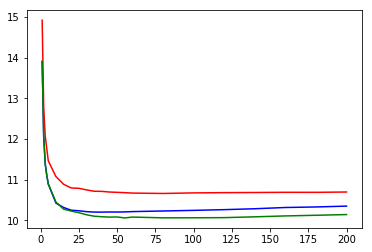

In [17]:
import matplotlib.pyplot as plt
plt.plot(ks, rmses_norm, 'b')
plt.plot(ks, rmses, 'r')
plt.plot(ks, my_rmses, 'g')
plt.show()

In [ ]:
"""
結果討論：

有normalize過的knn表現都比較好，因為normalize後將feature的影響力變得一樣，
譬如要預測性別，有個feature是身高，有個feature是體重，這兩個單位和數值不一樣，
直接拿來計算，會讓一公分跟一公斤的影響力一樣，而實際上不一定如此，
所以普遍來說normalize過後的表比較好。

可能也會有normalize後表現變差的情形，我推論可能是數值較大的剛好是影響力較大的feature，
剛好放大了這個feature的影響力，符合這個特定資料的特性，所以放原本資料的表現還比較好。

自己實作的knn表現比套件好，可能是因為remove oulier的效果，讓預測不受離群值影響，所以準確率提高。
"""